# NDVI temporal signature (time series) analysis by cluster (first classification) in Bajo de los Saladillos (2000-2022)

## Import libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

## Data processing

In [2]:
# Import data from GH repo
!wget https://raw.githubusercontent.com/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/refs/heads/main/Data_results/01_2_1erkmeans_ndvi_pivot.csv

--2025-06-10 02:50:12--  https://raw.githubusercontent.com/francobarrionuevoenv21/ClusteringPaddyFields_Fires_SanJavier/refs/heads/main/Data_results/01_2_1erkmeans_ndvi_pivot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18008873 (17M) [text/plain]
Saving to: ‘01_2_1erkmeans_ndvi_pivot.csv.2’

01_2_1erkmeans_ndvi 100%[===================>]  17.17M  --.-KB/s    in 0.1s    

2025-06-10 02:50:13 (176 MB/s) - ‘01_2_1erkmeans_ndvi_pivot.csv.2’ saved [18008873/18008873]



In [10]:
# Load the csv file
dfLoaded = pd.read_csv('/content/01_2_1erkmeans_ndvi_pivot.csv')

<ipython-input-10-8e25731b9d69>:2: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,26

In [11]:
# Quick visualization of the dataset
dfLoaded.head()

,cluster,longitude,latitude,NDVI1,NDVI1.1,NDVI1.2,NDVI1.3,NDVI1.4,NDVI1.5,NDVI1.6,...,NDVI1.516,NDVI1.517,NDVI1.518,NDVI1.519,NDVI1.520,NDVI1.521,NDVI1.522,NDVI1.523,NDVI1.524,NDVI1.525
0,NaN,NaN,NaN,2000-02-18,2000-03-05,2000-03-21,2000-04-06,2000-04-22,2000-05-08,2000-05-24,...,2022-07-28,2022-08-13,2022-08-29,2022-09-14,2022-09-30,2022-10-16,2022-11-01,2022-11-17,2022-12-03,2022-12-19
1,1.0,-60.152314,-30.651640,7037.0,7080.0,6628.0,7767.0,7267.0,7548.0,6825.0,...,5395.0,5549.0,5755.0,5548.0,4566.0,4422.0,4312.0,3869.0,4610.0,4772.0
2,1.0,-60.152314,-30.642657,7104.0,6867.0,5120.0,6631.0,6690.0,6722.0,6649.0,...,5589.0,6056.0,5580.0,5373.0,4763.0,4292.0,4366.0,4245.0,4476.0,4380.0
3,1.0,-60.152314,-30.635920,6332.0,6519.0,5008.0,7757.0,6428.0,6796.0,6221.0,...,5380.0,5208.0,5363.0,4623.0,4304.0,4075.0,4239.0,4105.0,4526.0,4504.0
4,1.0,-60.150069,-30.647149,7408.0,7166.0,5640.0,7737.0,7150.0,7491.0,6813.0,...,5675.0,6173.0,6132.0,5661.0,4632.0,4338.0,4116.0,3931.0,4502.0,4156.0


In [4]:
# Extract NDVI data and dates series
dfNDVIsamples = dfLoaded.copy()
pdsFechas = dfNDVIsamples.iloc[0, 3:]

## NDVI temporal signature visualizacion by cluster

In [22]:
Ncluster = 1 # SELECT THE CLUSTER FROM 1 TO 50
matrixClusterNDVI = dfNDVIsamples[dfNDVIsamples['cluster']==Ncluster].iloc[:, 3:].astype('float').to_numpy()/10000

<ipython-input-23-279c0f7dce5c>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axs.plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}', color='limegreen')


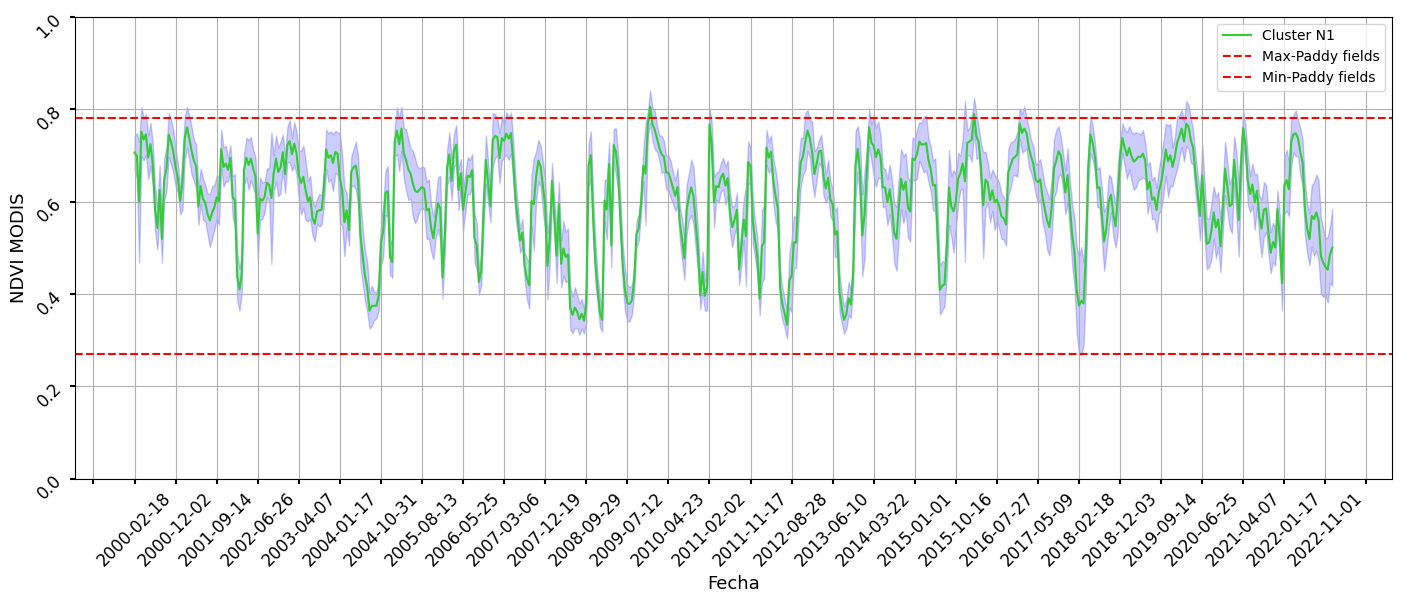

In [23]:
fig, axs = plt.subplots(figsize=(17, 6))

mean_1 = np.mean(matrixClusterNDVI, axis=0)
std_1 = np.std(matrixClusterNDVI, axis=0)

axs.plot(pdsFechas, mean_1, 'b-', label=f'Cluster N{Ncluster}', color='limegreen')
axs.fill_between(pdsFechas, mean_1 - std_1, mean_1 + std_1, color='b', alpha=0.2)

axs.set_ylabel('NDVI MODIS', fontsize=13)
axs.set_xlabel('Fecha', fontsize=13)

axs.axhline(y=0.78, label='Max-Paddy fields',color='red', linestyle='--')
axs.axhline(y=0.27, label='Min-Paddy fields',color='red', linestyle='--')

axs.xaxis.set_major_locator(plt.MultipleLocator(base=18))
axs.tick_params(axis='both', labelsize=12, rotation=45, width=1.5)

axs.grid(True)
axs.set_ylim(0,1)
axs.legend(loc='best')
plt.show()